# Machine Learning (laboratory instruction)
## Linear regression (part 4)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 4).ipynb
+-- 🖼 virus.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
The goal is to use linear regression to approximate a function that is not linear.

### Task. Computer Virus.
Read the data from the `virus.npz` file. This is a dataset with information about the spread of XXYZ0123 virus that took over many computers a few years back. The $x$ contains a number of hours (counting from first reported detections), and the $y$ contains the number of infected computers.

**Task**: Your task is to approximate the spread function. Note that this time the function is not linear.
Subtasks:
* Display the data on the chart (scatter plot)
* Use gradient descent to find a solution.
* Answer how many computers were infected:
    * a) after 30 day, 
    * b) after two months (60 days)?
    * c) Display both predictions on the chart.

**Tip**: To approximate a different function using linear regression you need to change the input data (the $x$ in this case). For instance, if you wish to approximate $f(x) = \sqrt{x}$ all you need to do is create a new input: $x' = \sqrt{x}$ and perform exactly the same steps as in previous laboratory, but using $x'$ instead of $x$.

**Tip 2**: You may need to use a different learning rate for bias.

In [1]:
# >>> WRITE YOUR SOLUTION HERE <<<
import numpy as np
import matplotlib.pyplot as plt
with open('virus.npz', 'rb') as f:
    data = np.load(f)
    x, y = data['x'], data['y']


In [2]:
plt.scatter(x, y, color='orange')
plt.xlabel('n. of hours (from first detection)')
plt.ylabel('n. of infected computers')

In [3]:
def f(x, a, b):
    return a * x + b

def mse(predicted, true):
    return np.square(np.subtract(predicted, true)).mean()

def mse_partial(x, predicted, true):
    df_a = 2 * (np.subtract(predicted, true) * x).mean()
    df_b = 2 * np.subtract(predicted, true).mean()
    return np.array([df_a, df_b])

Text(0, 0.5, 'n. of infected computers')

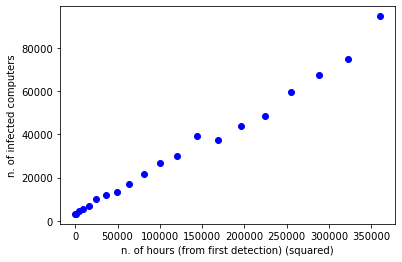

In [4]:

plt.scatter(x**2, y, color='blue')
plt.xlabel('n. of hours (from first detection) (squared)')
plt.ylabel('n. of infected computers')

# Substituting x' = x^2

final_error: 3572.4330402402024, a = 0.2411549100390687, b = 0.9971877839944431


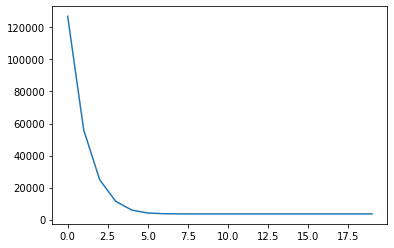

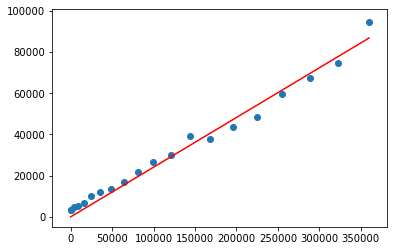

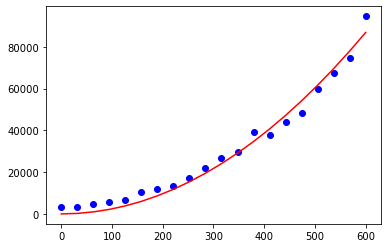

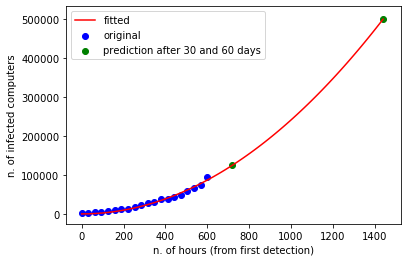

final approximator func = f(x)=0.241*x**2 + 0.997
After 30 days: 125015.70255203721
After 60 days: 500059.81864479685


In [5]:
history = []
coeffs = np.array([1.0, 1.0])
lr = np.array([1e-11, 1e-8])

x_prime = np.square(x)
#y_prime = np.sqrt(y)
for i in range(20):
    prediction = f(x_prime, *coeffs)
    #print(i, prediction)
    #print(prediction)
    error = mse(prediction, y)
    coeffs -= lr * mse_partial(x_prime, prediction, y)
    history.append(np.sqrt(error))

plt.plot(history)
a, b = coeffs
print(f'final_error: {history[-1]}, a = {a}, b = {b}')
plt.show()
plt.plot(x_prime, a * x_prime + b, color='red')
plt.scatter(x_prime, y)

plt.show()

f_approx = lambda x: a*x**2 + b
plt.scatter(x, y, label='original', color='blue')
plt.plot(x, f_approx(x), label='fitted', color='red')
plt.show()

plt.scatter(x, y, label='original', color='blue')
plt.plot(x, f_approx(x), label='fitted', color='red')
plt.plot(np.linspace(600, 1440), f_approx(np.linspace(600, 1440)), color='red')
plt.scatter([30 * 24, 60 * 24], [f_approx(30 * 24), f_approx(60 * 24)], color='green', label='prediction after 30 and 60 days')
plt.xlabel('n. of hours (from first detection)')
plt.ylabel('n. of infected computers')
plt.legend()
plt.show()

print(f'final approximator func = f(x)={a:.3}*x**2 + {b:.3}')
print(f'After 30 days: {f_approx(30 * 24)}')
print(f'After 60 days: {f_approx(60 * 24)}')

# Substituting y' = sqrt(y)

final_error: 440.2231852302772


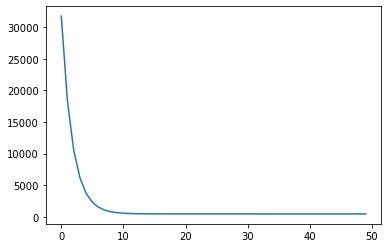

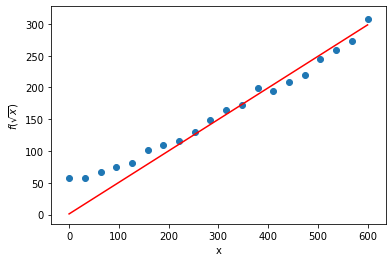

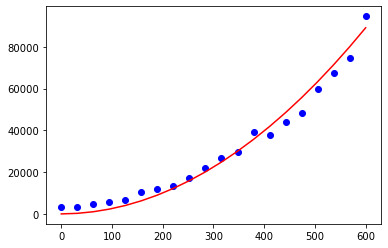

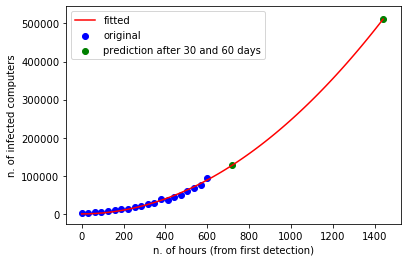

final approximator func = f(x)=0.246*x**2 + 0.966*x + 0.948
After 30 days: 128128.2373347654
After 60 days: 511119.4625262795


In [6]:
history = []
coeffs = np.array([1.0, 1.0])
lr = np.array([1e-6, 1e-4])

#x_prime = np.square(x)
y_prime = np.sqrt(y)
for i in range(50):
    prediction = f(x, *coeffs)
    #print(prediction)
    error = mse(prediction, y_prime)
    coeffs -= lr * mse_partial(x, prediction, y_prime)
    history.append(error)

plt.plot(history)
a, b = coeffs
print(f'final_error: {history[-1]}')
plt.show()
plt.plot(x, a * x + b, color='red')
plt.scatter(x, y_prime)
plt.xlabel("x")
plt.ylabel("$f(\sqrt{x})$")
plt.show()

# undo the transform
# we fit a line sqrt(y) = a * x + b
# to undo = y = (a*x + b) ^ 2
# y = a^2*x^2 + 2*a*x*b + b^2

f_approx = lambda x: a**2*x**2 + 2*a*b*x + b**2
plt.scatter(x, y, label='original', color='blue')
plt.plot(x, f_approx(x), label='fitted', color='red')
plt.show()


plt.scatter(x, y, label='original', color='blue')
plt.plot(x, f_approx(x), label='fitted', color='red')
plt.plot(np.linspace(600, 1440), f_approx(np.linspace(600, 1440)), color='red')
plt.scatter([30 * 24, 60 * 24], [f_approx(30 * 24), f_approx(60 * 24)], color='green', label='prediction after 30 and 60 days')
plt.xlabel('n. of hours (from first detection)')
plt.ylabel('n. of infected computers')
plt.legend()
plt.show()
print(f'final approximator func = f(x)={a**2:.3}*x**2 + {2*a*b:.3}*x + {b**2:.3}')
print(f'After 30 days: {f_approx(30 * 24)}')
print(f'After 60 days: {f_approx(60 * 24)}')